# **Letter classification study using the K Nearest Neighbors model**

## **Introduction**

This is the main study of a letter classification using the EMNIST letters database avaiable in https://www.nist.gov/itl/products-and-services/emnist-dataset

## **Generate dataset**

This part contains the functions to read the dataset saved in the ".npy" files to use it in the KNN classifier created. The ".npy" files are generated by the bash script called ./init.sh

In [1]:
# The dataTools is a python file created with functions that will help to load the dataset on the format we want
import dataTools as dt
import numpy as np

In [2]:
# This auxiliar function is used to separate a list of objects latter into their labels and the "images" 
# or features used in the classification
def separate_array(data):    
    image = []
    labels = []
    for line in data:
        image.append(np.array(line[:-1]))
        labels.append(line[-1])
    
    return image, labels

In [3]:
# Load database from the .npy file

X_train, Y_train = separate_array(np.load('./../train_classes.npy'))

In [4]:
# Load database from the .npy file

X_validation, Y_validation = separate_array(np.load('./../validation_classes.npy'))

In [5]:
train_array = dt.join_data(X_train, Y_train)

In [6]:
validation_array = dt.join_data(X_validation, Y_validation)

# **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

In [7]:
# The knn file is the python file we created with our KNN classifier

import knn
from sklearn.metrics import accuracy_score

In [22]:
# This function is used to show some results of the classification comparing the training dataset 
# in the classifier (to see if its accuracy is high)

def knn_array(train_array, new_array, Y_data, num_neighbors, norm, N):
    print("Using " + str(num_neighbors) + " neighbors")
    print("Using the " + norm + " norm\n")
    predicted_distances = []
    predicted_distances = knn.k_nearest_neighbors(train_array[0:N], new_array[0:N], num_neighbors, norm)
    print("The train accuracy is: " + str(round((accuracy_score(Y_data[0:N], predicted_distances) * 100), 3)) + "%\n")
    
    return predicted_distances

In [32]:
%%time 

N = 500

# Used the function above (KNN with 4 neighbors and norm L2)

predicted_train_l2 = knn_array(train_array, train_array, Y_train, 1, 'l2', N)

Using 1 neighbors
Using the l2 norm

The train accuracy is: 100.0%

CPU times: user 3.88 s, sys: 41.4 ms, total: 3.92 s
Wall time: 3.86 s


In [33]:
%%time 

N = 500

# Used the function above (KNN with 4 neighbors and norm L1)

predicted_train_l1 = knn_array(train_array, train_array, Y_train, 1, 'l1', N)

Using 1 neighbors
Using the l1 norm

The train accuracy is: 100.0%

CPU times: user 2.31 s, sys: 35.7 ms, total: 2.34 s
Wall time: 2.28 s


In [34]:
%%time 

N = 500

# Used the function above (KNN with 26 neighbors and norm L2)

predicted_validation_l2 = knn_array(train_array, validation_array, Y_validation, 10, 'l2', N)


Using 10 neighbors
Using the l2 norm

The train accuracy is: 23.6%

CPU times: user 3.99 s, sys: 55 ms, total: 4.04 s
Wall time: 3.95 s


In [35]:
%%time 

N = 500

# Used the function above (KNN with 26 neighbors and norm L1)

predicted_validation_l1 = knn_array(train_array, validation_array, Y_validation, 10, 'l1', N)

Using 10 neighbors
Using the l1 norm

The train accuracy is: 22.2%

CPU times: user 2.45 s, sys: 36.5 ms, total: 2.48 s
Wall time: 2.4 s


## **Visualizing the study**

This part consist a better visualization of the study done to better analyse the classifier

In [36]:
import matplotlib.pyplot as plt 
import itertools
from sklearn.metrics import confusion_matrix
import string
import numpy as np

In [37]:
# This function is the function that plots the confusion matrix only to better visualize the results

def plot_confusion_matrix(data_x, data_y, Ypred):
    classes = string.ascii_uppercase
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The train accuracy is: 100.0%

The train accuracy is: 100.0%



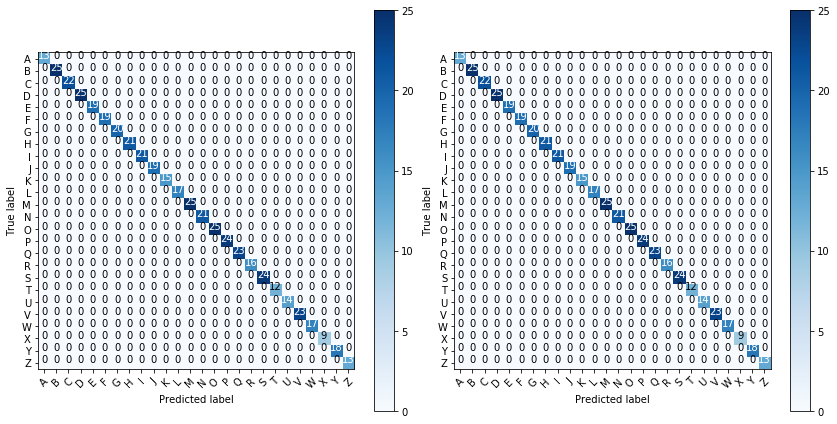

In [39]:
N = 500 # Since the dataset has a lot of values and we do not have powerfull computer 

#Plot confusion matrix for analyse the classification (train dataset)
plt.figure(figsize=(12,6))
plt.title('Train Confusion Matrix')

plt.subplot(121)
# plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(X_train[0:N], Y_train[0:N], predicted_train_l2)
print("The train accuracy is: " + str(round((accuracy_score(Y_train[0:N], predicted_train_l2) * 100), 3)) + "%\n")

plt.subplot(122)
# plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(X_train[0:N], Y_train[0:N], predicted_train_l1)
print("The train accuracy is: " + str(round((accuracy_score(Y_train[0:N], predicted_train_l1) * 100), 3)) + "%\n")


plt.savefig("./Results/Train")



The validation accuracy is: 23.6%

The validation accuracy is: 22.2%



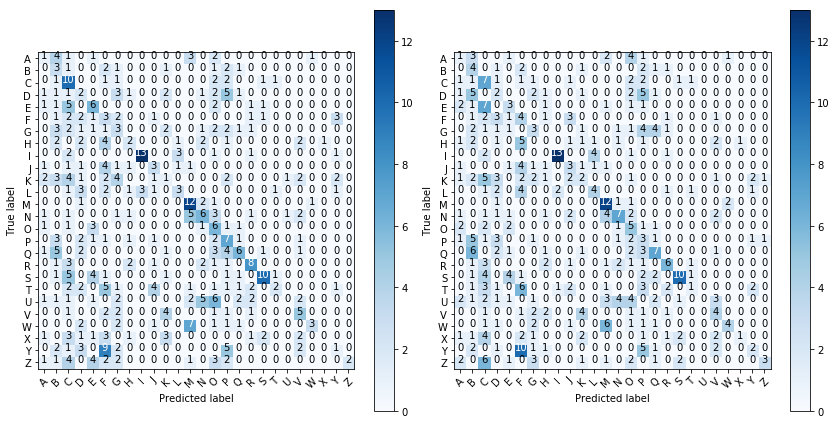

In [40]:
N = 500

#Plot confusion matrix for analyse the classification (validation dataset)
plt.figure(figsize=(12,6))
plt.title('Validation Confusion Matrix')

plt.subplot(121)
#plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(X_validation[0:N], Y_validation[0:N], predicted_validation_l2)
print("The validation accuracy is: " + str(round((accuracy_score(Y_validation[0:N], predicted_validation_l2) * 100), 3)) + "%\n")

plt.subplot(122)
#plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(X_validation[0:N], Y_validation[0:N], predicted_validation_l1)
print("The validation accuracy is: " + str(round((accuracy_score(Y_validation[0:N], predicted_validation_l1) * 100), 3)) + "%\n")



plt.savefig("./Results/Validation")
#plt.show()

## Hyperparameters study

This part consist on making a study of the hyperparameters of the KNN model

In [49]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_validation  = []

    for neighbors in values:
        
        print neighbors

        prediction_train = []
        prediction_validation = []

        prediction_train = knn.k_nearest_neighbors(X_train, X_train, neighbors, 'l2')
        accs_train.append(accuracy_score(Y_train, prediction_train))

        prediction_validation = knn.k_nearest_neighbors(X_train, X_validation, neighbors, 'l2')
        accs_validation.append(accuracy_score(Y_validation, prediction_validation))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_validation)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_validation,  label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k neighbors')
    plt.legend()
    plt.xticks(values)
    plt.show()  

26
27
28
29
30
31
32
33
34
35
36
37
38
39
Optimal number for k: 26


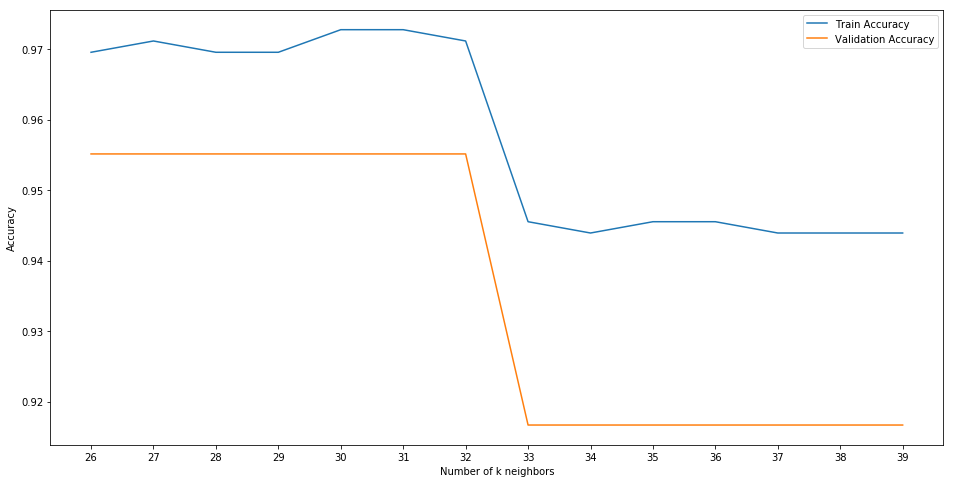

CPU times: user 1min 52s, sys: 1.34 s, total: 1min 53s
Wall time: 1min 51s


In [53]:
%%time 

tuning_parameter_new_knn(26, 40)

## **Best K-Nearest Neighbors model**

Finally after making the study of the hyperparameters we make another study to see the gain in performance

In [33]:
neighbor = 2
norm = 'l2'

In [34]:
%%time 

best_predicted_train = knn_train(neighbor, norm)

Using 2 neighbors
Using the l2 norm

The train accuracy is: 53.707%

CPU times: user 5.73 s, sys: 44.5 ms, total: 5.78 s
Wall time: 5.7 s


In [35]:
print("Test dataset has: " + str(test_set.length) + " letters")

Test dataset has: 208 letters


In [22]:
def knn_test(n_neighbors, norm):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(X_train, X_test, n_neighbors, norm)

    print("The validation accuracy is: " + str(round((accuracy_score(Y_test, predicted) * 100), 3)) + "%\n")

    
    return predicted

In [23]:
%%time 

predicted_test = knn_test(2, 'l1')

The validation accuracy is: 100.0%

CPU times: user 650 ms, sys: 28.2 ms, total: 678 ms
Wall time: 649 ms


In [38]:
def knn_train(n_neighbors, norm):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(X_train, X_train, n_neighbors, norm)

    print("The validation accuracy is: " + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%\n")

    
    return predicted

In [39]:
%%time 

predicted_train = knn_train(neighbor, norm)

The validation accuracy is: 53.707%

CPU times: user 6.77 s, sys: 60 ms, total: 6.83 s
Wall time: 6.74 s


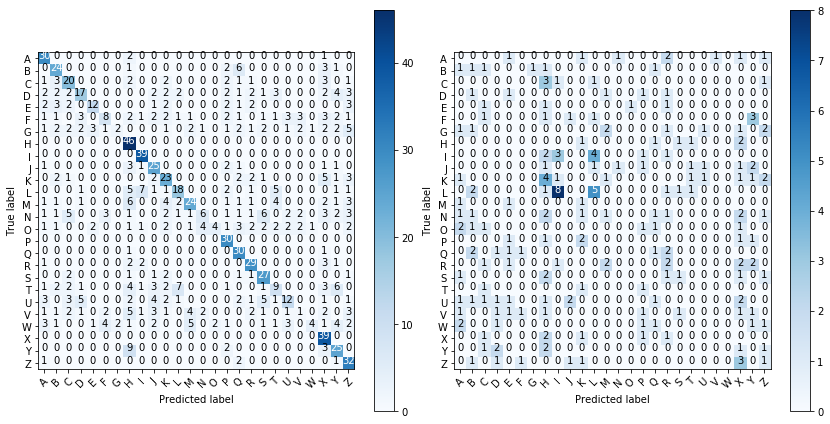

In [40]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_confusion_matrix(X_train, Y_train, predicted_train)

plt.subplot(122)
plot_confusion_matrix(X_test, Y_test, predicted_test)
plt.show()